In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

import mlflow

In [261]:
df = pd.read_csv("../datasets/META.csv")
df.shape
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [262]:
print(df.duplicated().sum())
print(df.skew(numeric_only=True))
df.isnull().sum()

0
Open         0.449146
High         0.447212
Low          0.449332
Close        0.447760
Adj Close    0.447760
Volume       5.893817
dtype: float64


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [263]:
df['Date']=pd.to_datetime(df['Date'])

In [264]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2901,2023-11-29,339.690002,339.899994,330.779999,332.200012,332.200012,16024500
2902,2023-11-30,331.890015,333.500000,322.399994,327.149994,327.149994,23146400
2903,2023-12-01,325.480011,326.859985,320.760010,324.820007,324.820007,15264700
2904,2023-12-04,317.290009,320.859985,313.660004,320.019989,320.019989,19037100


In [265]:
df.index = df.Date
df = df[['Close']]


In [266]:
df.head()

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


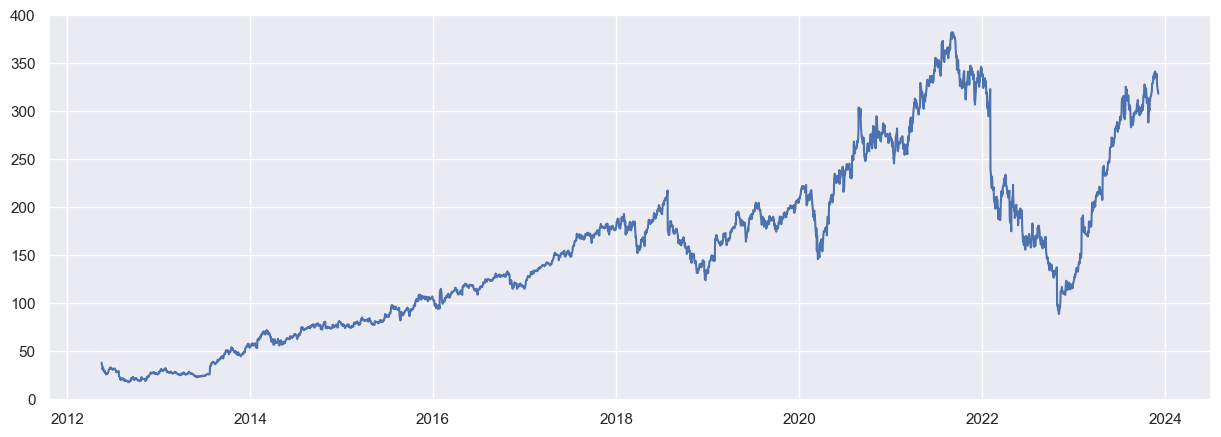

In [267]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df.Close)
plt.show()

In [271]:
train = df['2014-01-01':'2015-12-01']
test = df['2016-01-01':'2017-12-01']

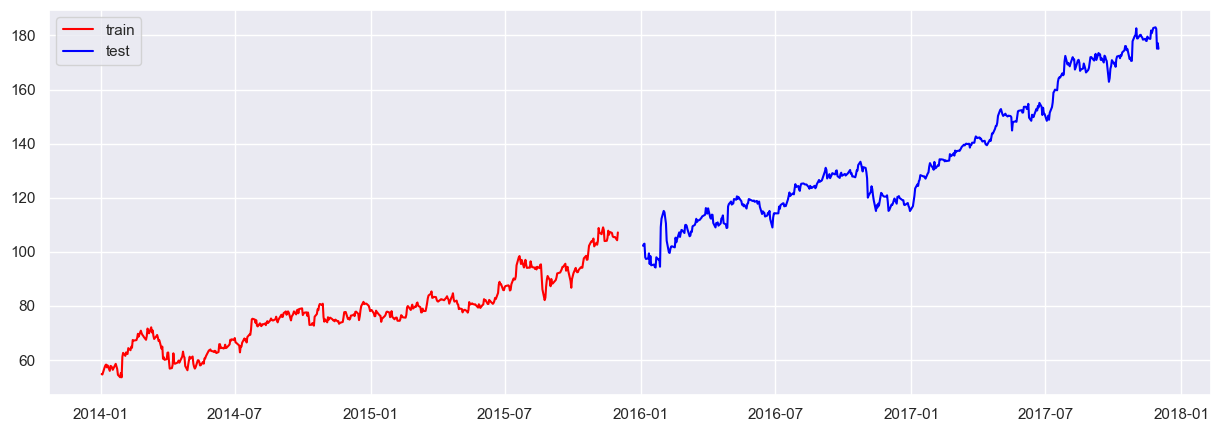

In [272]:
sns.set_theme()
plt.figure(figsize=(15,5))
plt.plot(train,c='red',label='train')
plt.plot(test,c='blue',label="test")
plt.legend()
plt.show()

In [ ]:
print(train.shape,test.shape)

(483, 1) (232, 1)


## EDA for timeseries

In [ ]:
# train['Date'] = pd.to_datetime(train['Date'])
# train = train.set_index('date')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

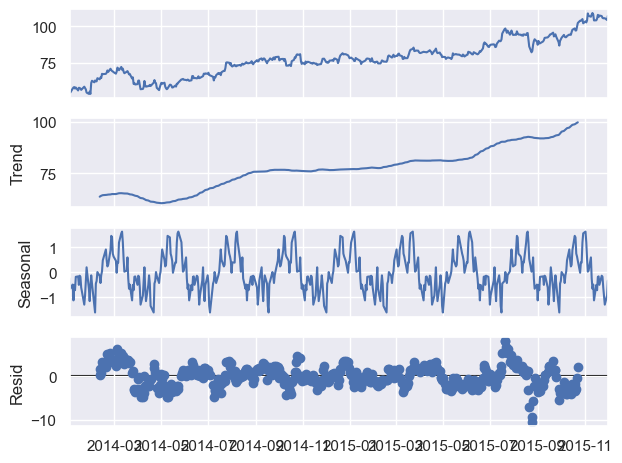

In [ ]:
decompose = seasonal_decompose(train,period=52)
decompose.plot()
plt.show()

In [273]:
result = adfuller(train.Close)
print('P Value: %f' % result[1])
train.head()

P Value: 0.939278


,Close
Date,
2014-01-02,54.709999
2014-01-03,54.560001
2014-01-06,57.200001
2014-01-07,57.919998
2014-01-08,58.230000


In [274]:
train.shift(1).head()

,Close
Date,
2014-01-02,NaN
2014-01-03,54.709999
2014-01-06,54.560001
2014-01-07,57.200001
2014-01-08,57.919998


In [275]:
traindiff = train  - train.shift(1)
traindiff.head()

,Close
Date,
2014-01-02,NaN
2014-01-03,-0.149998
2014-01-06,2.640000
2014-01-07,0.719997
2014-01-08,0.310002


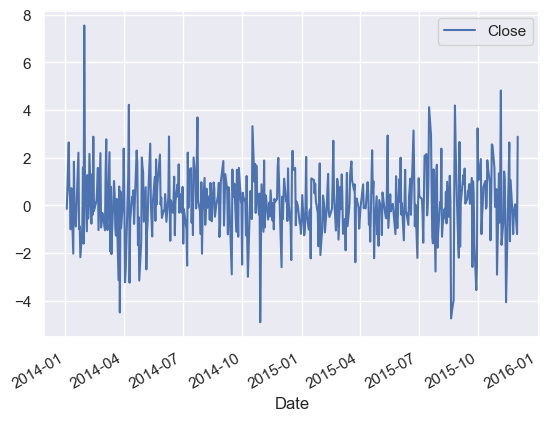

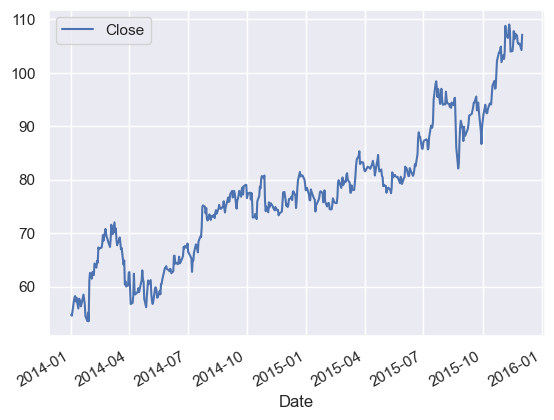

In [276]:


traindiff.plot(kind='line')
plt.show()
train.plot(kind='line')
plt.show()

In [280]:
result = adfuller(traindiff.dropna().Close)
print('P Value: %f' % result[1])
print(result)

P Value: 0.000000
(-10.62572280602157, 5.371594381541941e-19, 5, 476, {'1%': -3.444162847239118, '5%': -2.8676311169658177, '10%': -2.5700143303792107}, 1625.3671410131055)


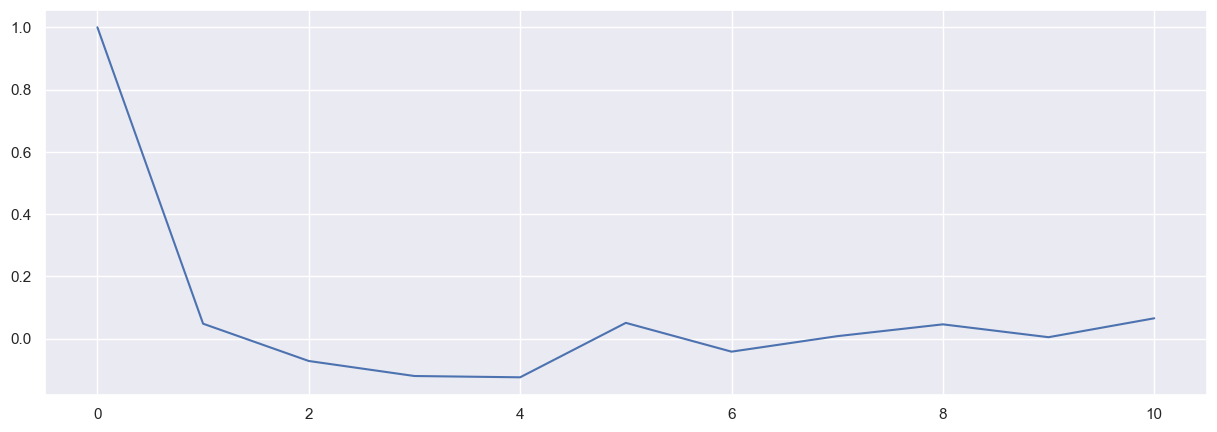

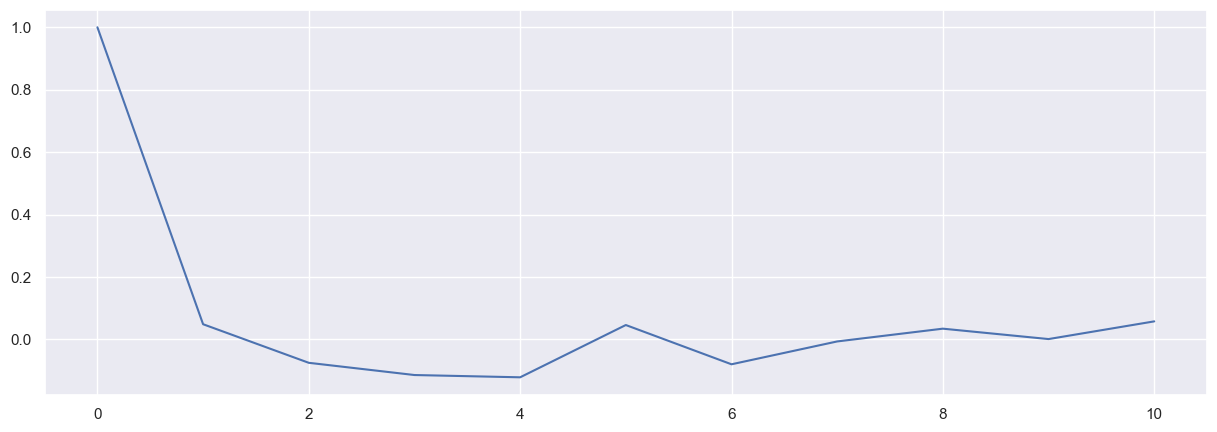

In [281]:

ac = acf(traindiff.dropna(), nlags=10)
pac = pacf(traindiff.dropna(), nlags=10, method='ols')
 
plt.figure(figsize=(15,5))
plt.plot(ac, label='ACF')
plt.show()
plt.figure(figsize=(15,5))
plt.plot(pac, label='PACF')
plt.show()

In [304]:
model = ARIMA(train, order=(1,2,1)) # p,d,q, p = 1, d = 2, q = 1
model_fit = model.fit()
ypred = pd.DataFrame(model_fit.forecast(steps=30))

# Set the index of ypred based on the forecast steps
ypred.index = pd.date_range(start=train.index[-1], periods=31)[1:]

# Print the forecast
print(ypred)

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            predicted_mean
2015-12-02      107.370391
2015-12-03      107.486819
2015-12-04      107.596423
2015-12-05      107.705679
2015-12-06      107.814918
2015-12-07      107.924155
2015-12-08      108.033393
2015-12-09      108.142631
2015-12-10      108.251868
2015-12-11      108.361106
2015-12-12      108.470344
2015-12-13      108.579581
2015-12-14      108.688819
2015-12-15      108.798057
2015-12-16      108.907294
2015-12-17      109.016532
2015-12-18      109.125770
2015-12-19      109.235007
2015-12-20      109.344245
2015-12-21      109.453483
2015-12-22      109.562720
2015-12-23      109.671958
2015-12-24      109.781196
2015-12-25      109.890433
2015-12-26      109.999671
2015-12-27      110.108909
2015-12-28      110.218146
2015-12-29      110.327384
2015-12-30      110.436622
2015-12-31      110.545859


C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


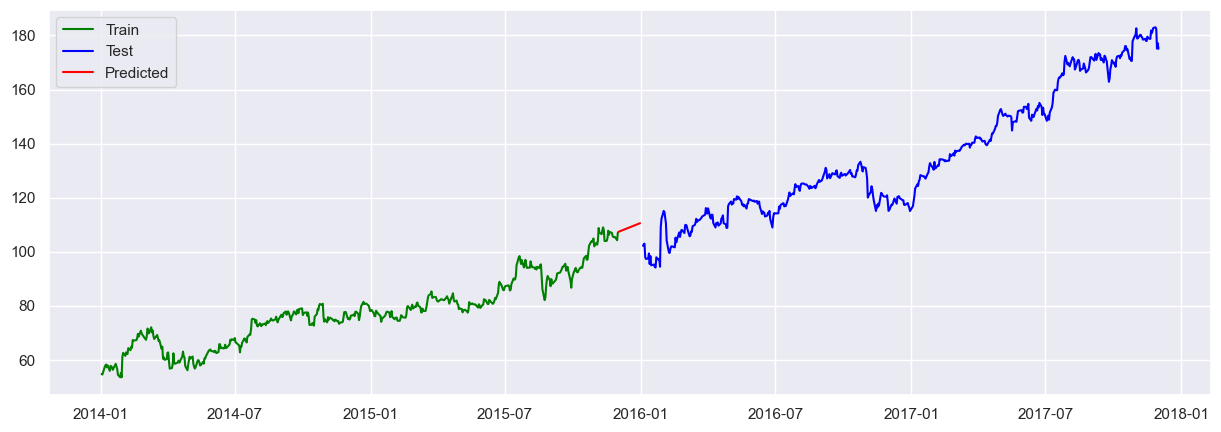

In [305]:


plt.figure(figsize=(15,5))
plt.plot(train, label='Train',c='green')
plt.plot(test, label='Test',c='blue')
plt.plot(ypred, label='Predicted',c='red')
plt.legend() 
plt.show()

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling th

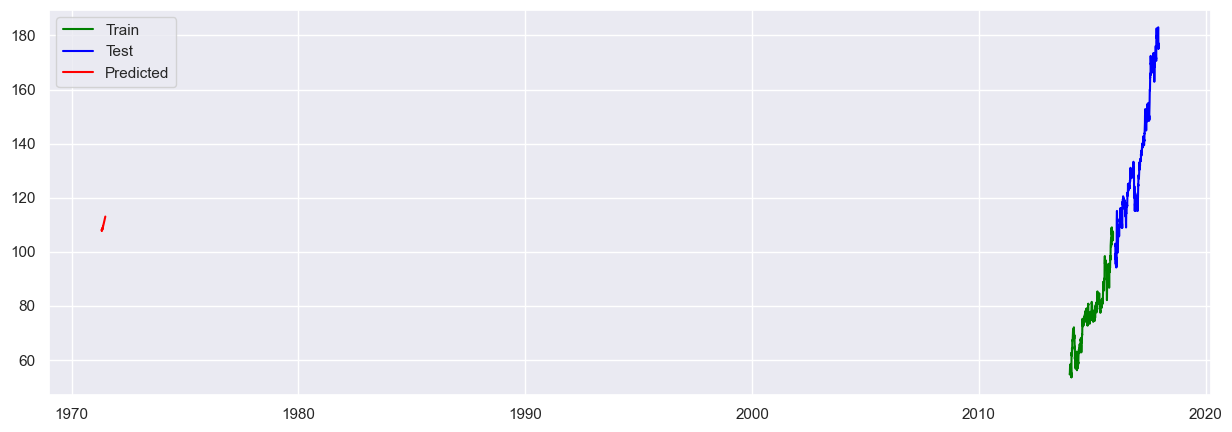

In [300]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(train, order=(1,2,1), seasonal_order=(1,0,1,12))
model2_fit = model2.fit()
ypred = pd.DataFrame(model2_fit.forecast(steps=60))
plt.figure(figsize=(15,5))
plt.plot(train, label='Train',c='green')
plt.plot(test, label='Test',c='blue')
plt.plot(ypred, label='Predicted',c='red')
plt.legend()   
plt.show()

In [ ]:
# pip install pmdarima
from pmdarima import auto_arima

In [306]:
model3 = auto_arima(train, seasonal=True, m=12,
                    startp=0, max_p=3, startq=0, max_q=3,start_P=0, max_P=3, start_Q=0, max_Q=3,suppress_warnings=True,trace=True)
ypred = pd.DataFrame(model3.predict(n_periods=60))
ypred.shape

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1724.439, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1731.415, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1729.828, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1728.887, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1732.110, Time=0.02 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1723.315, Time=0.79 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1722.437, Time=1.62 sec
 ARIMA(2,1,2)(3,0,0)[12] intercept   : AIC=1720.281, Time=3.49 sec
 ARIMA(2,1,2)(3,0,1)[12] intercept   : AIC=1722.281, Time=4.67 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1722.356, Time=2.42 sec
 ARIMA(1,1,2)(3,0,0)[12] intercept   : AIC=1721.158, Time=2.07 sec
 ARIMA(2,1,1)(3,0,0)[12] intercept   : AIC=1720.083, Time=2.95 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=1722.979, Time=1.22 sec
 ARIMA(2,1,1)(3,0,1)[12] intercept   : AIC=1722.083, Time=4.11 sec
 ARIMA(2,1,1)(2,0,1

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(60, 1)

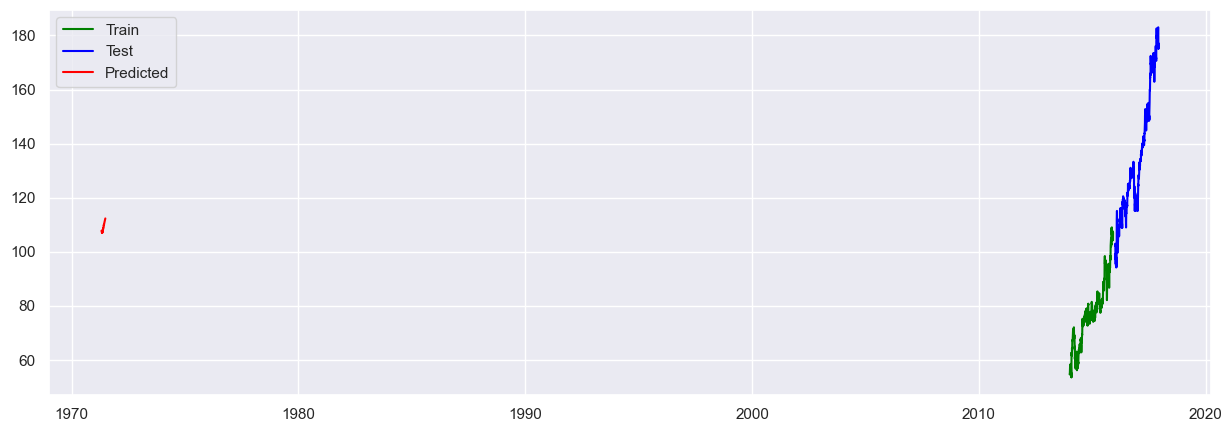

In [307]:
plt.figure(figsize=(15,5))
plt.plot(train, label='Train',c='green')
plt.plot(test, label='Test',c='blue')
plt.plot(ypred, label='Predicted',c='red')
plt.legend()   
plt.show()